In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd, os

# STEP 1: Set your correct file path below ===
path = "/content/seafood_prices_2000_2025_indian_cities.csv"

#STEP 2: Check file exists ===
print("File exists:", os.path.exists(path))
if not os.path.exists(path):
    raise FileNotFoundError("⚠️ File not found! Check your path above.")

# STEP 3: Read first 10 rows ===
df = pd.read_csv(path, nrows=10)
print("\n--- Columns ---")
print(df.columns.tolist())

print("\n--- First 10 Rows ---")
print(df.head(10).to_string())

#STEP 4: Read a small sample for diagnostics ===
df_sample = pd.read_csv(path, nrows=5000)
print("\nShape of sample:", df_sample.shape)

# STEP 5: Try to identify main fields automatically ===
date_cols = [c for c in df_sample.columns if 'date' in c.lower() or 'day' in c.lower()]
city_cols = [c for c in df_sample.columns if 'city' in c.lower() or 'market' in c.lower() or 'state' in c.lower()]
species_cols = [c for c in df_sample.columns if 'species' in c.lower() or 'fish' in c.lower() or 'name' in c.lower()]
price_cols = [c for c in df_sample.columns if 'price' in c.lower() or 'rate' in c.lower() or 'rs' in c.lower()]

print("\nPossible date columns:", date_cols)
print("Possible city/state columns:", city_cols)
print("Possible species columns:", species_cols)
print("Possible price columns:", price_cols)


File exists: True

--- Columns ---
['Date', 'Seafood_Type', 'City', 'Weight_kg', 'Temperature_C', 'Fuel_Cost_USD', 'Demand_Index', 'Season', 'Market_Price_USD_per_kg']

--- First 10 Rows ---
         Date Seafood_Type            City  Weight_kg  Temperature_C  Fuel_Cost_USD  Demand_Index Season  Market_Price_USD_per_kg
0  2000-01-01     Mackerel          Panaji       7.11           30.9           1.62          0.22    Low                     1.70
1  2000-01-01      Tilapia          Mumbai       8.24           31.0           1.84          0.45    Low                     4.87
2  2000-01-04          Cod     Pondicherry       2.53           29.2           1.22          0.54   High                    11.60
3  2000-01-04         Tuna          Mumbai       3.04           27.0           1.42          0.49   High                     9.87
4  2000-01-04      Lobster       Ahmedabad       2.24           24.7           2.83          0.28   High                    11.96
5  2000-01-05         Tuna   

In [4]:
print(df.isna().sum())          # Check for missing values
print(df.duplicated().sum())    # Check for duplicates
print(df.describe())            # Quick sanity check on numeric columns


Date                       0
Seafood_Type               0
City                       0
Weight_kg                  0
Temperature_C              0
Fuel_Cost_USD              0
Demand_Index               0
Season                     0
Market_Price_USD_per_kg    0
dtype: int64
0
       Weight_kg  Temperature_C  Fuel_Cost_USD  Demand_Index  \
count  10.000000      10.000000      10.000000     10.000000   
mean    3.542000      27.000000       2.124000      0.498000   
std     2.645582       3.847654       0.570423      0.181952   
min     0.860000      18.500000       1.220000      0.220000   
25%     1.685000      25.225000       1.675000      0.442500   
50%     2.635000      27.500000       2.225000      0.470000   
75%     5.372500      29.800000       2.600000      0.600000   
max     8.240000      31.000000       2.830000      0.860000   

       Market_Price_USD_per_kg  
count                10.000000  
mean                  9.218000  
std                   3.859778  
min            

In [5]:
print(df.shape)
print(df.info())
print(df.describe())
print(df['City'].value_counts().head())
print(df['Seafood_Type'].value_counts().head())


(10, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     10 non-null     object 
 1   Seafood_Type             10 non-null     object 
 2   City                     10 non-null     object 
 3   Weight_kg                10 non-null     float64
 4   Temperature_C            10 non-null     float64
 5   Fuel_Cost_USD            10 non-null     float64
 6   Demand_Index             10 non-null     float64
 7   Season                   10 non-null     object 
 8   Market_Price_USD_per_kg  10 non-null     float64
dtypes: float64(5), object(4)
memory usage: 852.0+ bytes
None
       Weight_kg  Temperature_C  Fuel_Cost_USD  Demand_Index  \
count  10.000000      10.000000      10.000000     10.000000   
mean    3.542000      27.000000       2.124000      0.498000   
std     2.645582       3.847654       0.570

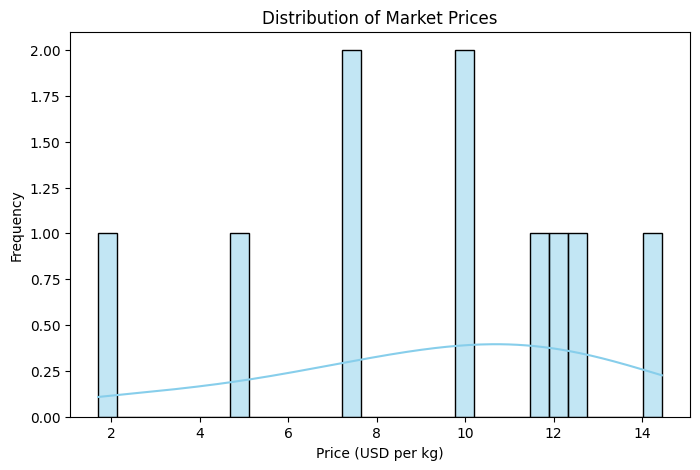

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['Market_Price_USD_per_kg'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Market Prices")
plt.xlabel("Price (USD per kg)")
plt.ylabel("Frequency")
plt.show()


/tmp/ipython-input-1645950540.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_prices.values, y=city_prices.index, palette='viridis')


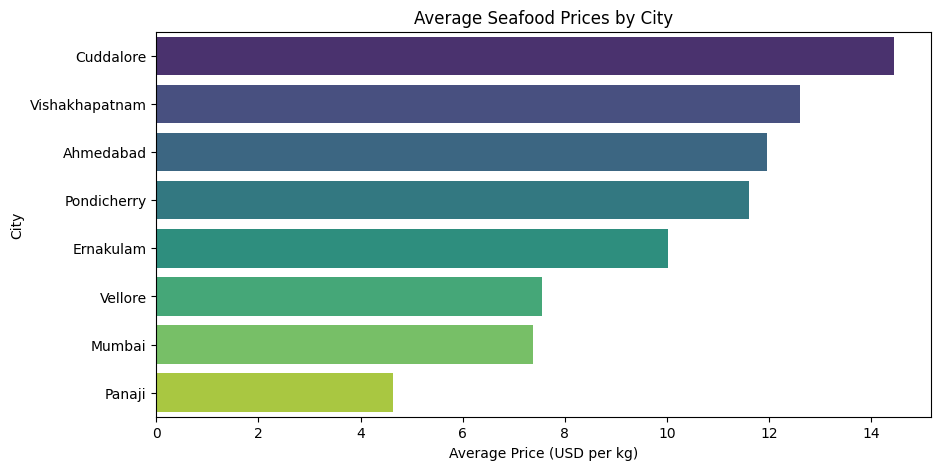

In [7]:
plt.figure(figsize=(10,5))
city_prices = df.groupby('City')['Market_Price_USD_per_kg'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=city_prices.values, y=city_prices.index, palette='viridis')
plt.title("Average Seafood Prices by City")
plt.xlabel("Average Price (USD per kg)")
plt.ylabel("City")
plt.show()


/tmp/ipython-input-1754187828.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=species_prices.values, y=species_prices.index, palette='coolwarm')


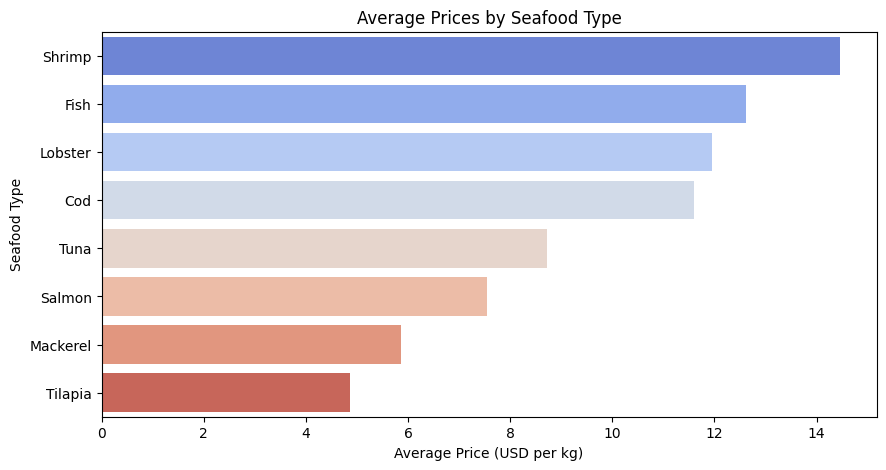

In [8]:
plt.figure(figsize=(10,5))
species_prices = df.groupby('Seafood_Type')['Market_Price_USD_per_kg'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=species_prices.values, y=species_prices.index, palette='coolwarm')
plt.title("Average Prices by Seafood Type")
plt.xlabel("Average Price (USD per kg)")
plt.ylabel("Seafood Type")
plt.show()


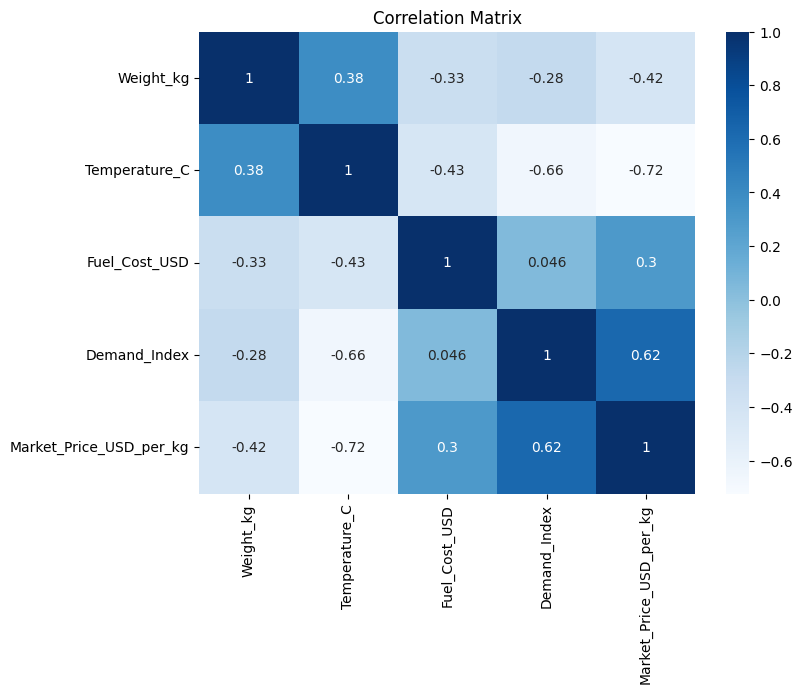

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title("Correlation Matrix")
plt.show()


In [13]:
# run in a Colab cell (shell)
!pip install xgboost pmdarima --quiet


In [ ]:
# load data & basic preprocessing
import pandas as pd, numpy as np
from sklearn.model_selection import train_test_split

PATH = "/content/seafood_prices_2000_2025_indian_cities.csv"  # change if needed
df = pd.read_csv(PATH)

# date parsing
df['Date'] = pd.to_datetime(df['Date'].astype(str).str.strip(), errors='coerce', infer_datetime_format=True)
# drop any rows with invalid date or missing target
df = df.dropna(subset=['Date', 'Market_Price_USD_per_kg']).reset_index(drop=True)

# quick numeric cast
for c in ['Weight_kg','Temperature_C','Fuel_Cost_USD','Demand_Index','Market_Price_USD_per_kg']:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

# shuffle (keeps reproducible)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

print("Loaded rows:", len(df))
print(df.columns.tolist())


Loaded rows: 10000
['Date', 'Seafood_Type', 'City', 'Weight_kg', 'Temperature_C', 'Fuel_Cost_USD', 'Demand_Index', 'Season', 'Market_Price_USD_per_kg']


/tmp/ipython-input-1288952207.py:9: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date'] = pd.to_datetime(df['Date'].astype(str).str.strip(), errors='coerce', infer_datetime_format=True)


In [ ]:
import pandas as pd
import numpy as np

df_feat = df.copy()

# Extract useful date components
df_feat['Date'] = pd.to_datetime(df_feat['Date'], errors='coerce')
df_feat['Year'] = df_feat['Date'].dt.year
df_feat['Month'] = df_feat['Date'].dt.month
df_feat['Quarter'] = df_feat['Date'].dt.quarter

# create interaction features
df_feat['Fuel_x_Demand'] = df_feat['Fuel_Cost_USD'] * df_feat['Demand_Index']
df_feat['Temp_x_Weight'] = df_feat['Temperature_C'] * df_feat['Weight_kg']

#Convert 'Season' to numeric via one-hot encoding
df_feat = pd.get_dummies(df_feat, columns=['Season', 'Seafood_Type', 'City'], drop_first=True)

df_feat.head()


,Date,Weight_kg,Temperature_C,Fuel_Cost_USD,Demand_Index,Market_Price_USD_per_kg,Year,Month,Quarter,Fuel_x_Demand,...,City_Mangalore,City_Mumbai,City_Panaji,City_Pondicherry,City_Porbandar,City_Surat,City_Thiruvananthapuram,City_Vellore,City_Visakhapatnam,City_Vishakhapatnam
0,2016-02-18,5.49,21.8,2.37,0.51,14.61,2016,2,1,1.2087,...,False,False,False,False,False,False,False,False,False,False
1,2012-03-16,1.69,27.7,0.89,0.86,33.03,2012,3,1,0.7654,...,False,False,False,False,False,False,False,False,False,False
2,2004-07-12,6.81,25.8,1.17,0.41,8.39,2004,7,3,0.4797,...,False,False,False,False,False,False,False,True,False,False
3,2012-05-13,3.54,28.4,2.60,0.32,3.00,2012,5,2,0.8320,...,False,False,False,True,False,False,False,False,False,False
4,2011-09-28,5.30,28.3,1.83,0.67,19.76,2011,9,3,1.2261,...,False,True,False,False,False,False,False,False,False,False


In [16]:
X = df_feat.drop(['Date', 'Market_Price_USD_per_kg'], axis=1)
y = df_feat['Market_Price_USD_per_kg']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math

rf = RandomForestRegressor(
    n_estimators=500,
    max_depth=20,
    min_samples_split=4,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("RF R²:", round(r2_score(y_test, y_pred_rf), 4))
print("RF RMSE:", round(math.sqrt(mean_squared_error(y_test, y_pred_rf)), 4))
print("RF MAE:", round(mean_absolute_error(y_test, y_pred_rf), 4))


RF R²: 0.9349
RF RMSE: 1.4973
RF MAE: 1.1994


In [18]:
print(X.columns)


Index(['Weight_kg', 'Temperature_C', 'Fuel_Cost_USD', 'Demand_Index', 'Year',
       'Month', 'Quarter', 'Fuel_x_Demand', 'Temp_x_Weight', 'Season_Low',
       'Seafood_Type_Cod', 'Seafood_Type_Crab', 'Seafood_Type_Fish',
       'Seafood_Type_Lobster', 'Seafood_Type_Mackerel', 'Seafood_Type_Salmon',
       'Seafood_Type_Shrimp', 'Seafood_Type_Tilapia', 'Seafood_Type_Tuna',
       'City_Bengaluru', 'City_Chennai', 'City_Cuddalore', 'City_Daman',
       'City_Ernakulam', 'City_Goa Town', 'City_Hyderabad', 'City_Kochi',
       'City_Kolkata', 'City_Mangalore', 'City_Mumbai', 'City_Panaji',
       'City_Pondicherry', 'City_Porbandar', 'City_Surat',
       'City_Thiruvananthapuram', 'City_Vellore', 'City_Visakhapatnam',
       'City_Vishakhapatnam'],
      dtype='object')


In [19]:
from sklearn.metrics import r2_score, mean_squared_error
import math

# assuming rf, X_train, X_test, y_train, y_test exist
train_pred = rf.predict(X_train)
test_pred  = rf.predict(X_test)

print("RF train R²:", round(r2_score(y_train, train_pred), 4))
print("RF test  R²:", round(r2_score(y_test, test_pred), 4))
print("RF train RMSE:", round(math.sqrt(mean_squared_error(y_train, train_pred)),4))
print("RF test  RMSE:", round(math.sqrt(mean_squared_error(y_test, test_pred)),4))


RF train R²: 0.9869
RF test  R²: 0.9349
RF train RMSE: 0.6908
RF test  RMSE: 1.4973


In [20]:
from sklearn.model_selection import cross_val_score
import numpy as np

cv_scores = cross_val_score(rf, X, y, cv=5, scoring='r2', n_jobs=-1)
print("CV R² scores:", np.round(cv_scores,4))
print("Mean CV R²:", np.round(cv_scores.mean(),4))


CV R² scores: [0.9401 0.9355 0.9355 0.9365 0.9391]
Mean CV R²: 0.9373


In [21]:
corrs = X.corrwith(y).abs().sort_values(ascending=False)
print("Top correlations with target:\n", corrs.head(15))


Top correlations with target:
 Demand_Index             0.668363
Fuel_x_Demand            0.517516
Seafood_Type_Lobster     0.445040
Season_Low               0.210496
Seafood_Type_Fish        0.192525
Seafood_Type_Crab        0.184676
Temperature_C            0.167476
Seafood_Type_Tilapia     0.160283
Seafood_Type_Mackerel    0.131824
Seafood_Type_Shrimp      0.131396
Seafood_Type_Tuna        0.059436
Temp_x_Weight            0.055738
Seafood_Type_Salmon      0.049754
Fuel_Cost_USD            0.048978
City_Mumbai              0.046471
dtype: float64


In [22]:
import pandas as pd
from sklearn.metrics import r2_score

# assuming df is your main dataset
group_means = df.groupby(['City','Seafood_Type'])['Market_Price_USD_per_kg'].mean().rename('gm')
df_with_gm = df.join(group_means, on=['City','Seafood_Type'])

baseline_r2 = r2_score(df_with_gm['Market_Price_USD_per_kg'], df_with_gm['gm'])
print("Baseline (Group Mean) R²:", round(baseline_r2, 4))


Baseline (Group Mean) R²: 0.3738


In [23]:
from sklearn.model_selection import GroupKFold

groups = df['City'].values
gkf = GroupKFold(n_splits=5)
cv_scores = cross_val_score(rf, X, y, cv=gkf, groups=groups, scoring='r2', n_jobs=-1)

print("GroupKFold by City R²:", np.round(cv_scores, 4))
print("Mean:", np.round(cv_scores.mean(), 4))


GroupKFold by City R²: [0.9294 0.9451 0.9259 0.9432 0.9354]
Mean: 0.9358


In [24]:
pip install xgboost


In [25]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math

# Initialize model
xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=10,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

# Fit the model
xgb.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb.predict(X_test)
y_train_pred_xgb = xgb.predict(X_train)

# Metrics
print("XGBoost Train R²:", round(r2_score(y_train, y_train_pred_xgb), 4))
print("XGBoost Test R²:", round(r2_score(y_test, y_pred_xgb), 4))
print("XGBoost RMSE:", round(math.sqrt(mean_squared_error(y_test, y_pred_xgb)), 4))
print("XGBoost MAE:", round(mean_absolute_error(y_test, y_pred_xgb), 4))


XGBoost Train R²: 0.9995
XGBoost Test R²: 0.9413
XGBoost RMSE: 1.4217
XGBoost MAE: 1.1261


In [26]:
print("Columns in X:")
print(X.columns.tolist())

# Check for any suspicious correlations with target
import pandas as pd
corrs = X.corrwith(y).abs().sort_values(ascending=False)
print("\nTop correlated features:")
print(corrs.head(10))


Columns in X:
['Weight_kg', 'Temperature_C', 'Fuel_Cost_USD', 'Demand_Index', 'Year', 'Month', 'Quarter', 'Fuel_x_Demand', 'Temp_x_Weight', 'Season_Low', 'Seafood_Type_Cod', 'Seafood_Type_Crab', 'Seafood_Type_Fish', 'Seafood_Type_Lobster', 'Seafood_Type_Mackerel', 'Seafood_Type_Salmon', 'Seafood_Type_Shrimp', 'Seafood_Type_Tilapia', 'Seafood_Type_Tuna', 'City_Bengaluru', 'City_Chennai', 'City_Cuddalore', 'City_Daman', 'City_Ernakulam', 'City_Goa Town', 'City_Hyderabad', 'City_Kochi', 'City_Kolkata', 'City_Mangalore', 'City_Mumbai', 'City_Panaji', 'City_Pondicherry', 'City_Porbandar', 'City_Surat', 'City_Thiruvananthapuram', 'City_Vellore', 'City_Visakhapatnam', 'City_Vishakhapatnam']

Top correlated features:
Demand_Index             0.668363
Fuel_x_Demand            0.517516
Seafood_Type_Lobster     0.445040
Season_Low               0.210496
Seafood_Type_Fish        0.192525
Seafood_Type_Crab        0.184676
Temperature_C            0.167476
Seafood_Type_Tilapia     0.160283
Seafood_T

In [27]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
import numpy as np

r2_scores = []
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    model = XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=10,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )
    model.fit(X_train, y_train)
    r2_scores.append(r2_score(y_test, model.predict(X_test)))

print("R² scores across 5 random splits:", np.round(r2_scores, 4))
print("Mean R²:", round(np.mean(r2_scores), 4))


R² scores across 5 random splits: [0.9426 0.9428 0.9441 0.943  0.9466]
Mean R²: 0.9438


In [28]:
import pandas as pd
feat_imp = pd.Series(xgb.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feat_imp.head(15))


Seafood_Type_Lobster     0.522711
Seafood_Type_Crab        0.126744
Seafood_Type_Shrimp      0.079491
Demand_Index             0.046185
Seafood_Type_Salmon      0.042468
Season_Low               0.034237
Seafood_Type_Fish        0.026130
Seafood_Type_Cod         0.023498
Seafood_Type_Tuna        0.017610
Seafood_Type_Tilapia     0.016230
Seafood_Type_Mackerel    0.013724
Fuel_x_Demand            0.005727
City_Mumbai              0.005335
City_Goa Town            0.004193
City_Vellore             0.002876
dtype: float32


In [ ]:

!pip install --upgrade --force-reinstall "numpy==1.26.4" "pmdarima==2.0.4" --quiet
import numpy as np, pmdarima
print(" Fixed: NumPy", np.__version__, "| pmdarima", pmdarima.__version__)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.3 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
dask-cudf-cu12 25.6.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.3 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
cudf-cu12 25.6.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.3 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is inco

In [ ]:
# confirm forecast array length and values
print("forecast length:", len(forecast))
print("forecast sample:", np.round(forecast[:5],3))

# check test index end and types
print("test start, end:", test.index.min(), test.index.max(), type(test.index[0]))
print("test freq:", test.index.freq)    # might be None if not proper DatetimeIndex with freq

#  show forecast_index you made
print("forecast_index (first 5):", forecast_index[:5])


forecast length: 12
forecast sample: 2025-01-01    13.237
2025-02-01    11.606
2025-03-01    12.459
2025-04-01    11.920
2025-05-01    12.401
Freq: MS, dtype: float64
test start, end: 2025-01-01 00:00:00 2025-12-01 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
test freq: <MonthBegin>
forecast_index (first 5): DatetimeIndex(['2026-01-01', '2026-02-01', '2026-03-01', '2026-04-01',
               '2026-05-01'],
              dtype='datetime64[ns]', freq='MS')


test.index start/end: 2025-01-01 00:00:00 2025-12-01 00:00:00
forecast_for_test index start/end: 2025-01-01 00:00:00 2025-12-01 00:00:00


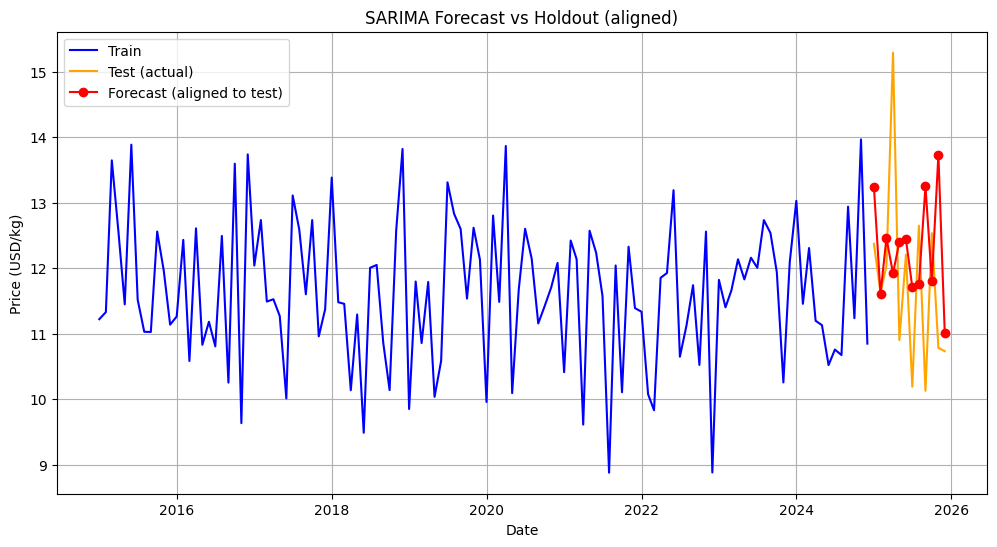

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ASSUMPTION:    `forecast` is the numpy array produced for the holdout (length == len(test))
#                `test` is your holdout pd.Series (DatetimeIndex with monthly freq)
#                `train` is the training pd.Series used earlier
# If your forecast covers different number of periods adjust below accordingly.

# Align forecast to test (for holdout comparison)
forecast_for_test = pd.Series(forecast[:len(test)], index=test.index)

# Build a future index for any remaining forecast values (if forecast was longer)
#    If your forecast was only for the holdout, this next block will create an empty future series.
remaining = len(forecast) - len(test)
if remaining > 0:
    last_hist = ts.index.max()
    future_start = last_hist + pd.DateOffset(months=1)
    future_index = pd.date_range(start=future_start, periods=remaining, freq='MS')
    future_forecast = pd.Series(forecast[len(test):], index=future_index)
else:
    future_forecast = pd.Series(dtype=float)

# Sanity prints
print("test.index start/end:", test.index.min(), test.index.max())
print("forecast_for_test index start/end:", forecast_for_test.index.min(), forecast_for_test.index.max())
if not future_forecast.empty:
    print("future_forecast index start/end:", future_forecast.index.min(), future_forecast.index.max())

plt.figure(figsize=(12,6))
plt.plot(train, label='Train', color='blue')
plt.plot(test, label='Test (actual)', color='orange')
plt.plot(forecast_for_test, label='Forecast (aligned to test)', color='red', marker='o')
if not future_forecast.empty:
    plt.plot(future_forecast, label='Future forecast (beyond test)', color='magenta', linestyle='--', marker='x')
plt.title('SARIMA Forecast vs Holdout (aligned)')
plt.xlabel('Date')
plt.ylabel('Price (USD/kg)')
plt.legend()
plt.grid(True)
plt.show()
